## PROJECT SUMMARY ##

**Client:** News Agency adapting to the evolving digital landscape.

**Objective**: Develop a central database for all news articles, with a focus on effective categorization, and create a user-friendly mobile app that delivers personalized news content.

**Current Practices:**

*   News anchors read news on air.
*   A weekly newspaper is printed and sent to subscribers.


**Issues with Current Practices:**


*   The approach is disorganized.'
*   Declining audience for radio, TV news, and printed newspapers.
*   Preference for mobile devices over traditional media.
*   High manual effort in reading news.



**Project Goal:**


*   Implement a centralized news database.
*   Develop a mobile app that categorizes and personalizes news content for users.
*   Reduce manual effort through automation.


**Role:**


*   As an AI Engineer, enhance security protocols and implement proactive measures.
*   Use provided dataset to build a model for classifying news articles into categories.
*   Distribute categorized news to users based on their subscriptions.

**Dataset Description:**

  https://storage.googleapis.com/accredian-assets/Backend_Assests/ZIP/capstone_projects/Data.zip


   **Provided by:** Business Intelligence Analysts of the company.

   **Content:** Images of different celebrities and news articles.

   **Divisions:**  Train, validation (val), and test sets.
  Train and Val Sets:

   **Columns:** REF_NO, category, Headline, author, link, date, and a short description.

   **Train Set:** Approximately 160,683 rows.

   **Val Set:** Approximately 40,172 rows.

**Problem Specifics:**

   **Deliverables:** Predict news article categories as per customer subscriptions.

   **Deep Learning Task:** Build a Text Classification model to categorize news articles.

   **Target:** Accurately predict the categories of news articles based on their text.

   **Win Condition:** The model successfully classifies articles based on the provided text sequences.

# APPROACH TO SOLVE THE PROBLEM: ( news Artcle text classification)



1.   **Data Collection**

  *   Collect Data: Gather the necessary datasets for training, validation, and testing.


2.   **TEXT Preprocessing**

  *   Clean Data: Remove noise, handle missing values, and normalize text (e.g., lowercasing, removing punctuation).   
  *   Tokenization: Split text into words or subwords.
  *  Stop Words Removal: Remove common words that do not add significant meaning
  *   Stemming/Lemmatization: Reduce words to their root form

3.   **Text parsing and initial EDA(Exploratory data analyais)**

4.  **Text Representation:**
  *  Convert text into numerical form using techniques like Bag of Words, TF-IDF, or word embeddings.

5.   **Further EDA:**
  *   Visualize data patterns and insights from the numerical features. if required

6.   **Feature Engineering**

7.   **Model Selection and Training**

8.   **Model Evaluation**

9.  **Model Testing:**









In [ ]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 3.4 MB/s eta 0:00:00


In [ ]:
# IMPORTING NECESSARY LIBRARES:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# IMPORTING NECESSARY LIBRARES:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import string
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Import EarlyStopping from tensorflow.keras.callbacks
from tensorflow.keras.callbacks import EarlyStopping

# Import mixed_precision directly from tensorflow.keras
from tensorflow.keras import mixed_precision
from transformers import AutoTokenizer
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.losses import CategoricalCrossentropy
#--------------------------------
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression

In [ ]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

#STEP1: DATA COLLECTION

In [ ]:
# unzip the dataset
!unzip /content/drive/MyDrive/NLP_PROJECT_IITG/Data.zip -d /content/drive/MyDrive/NLP_PROJECT_IITG/

# list the extracted files
os.listdir('/content/drive/MyDrive/NLP_PROJECT_IITG')

Archive:  /content/drive/MyDrive/NLP_PROJECT_IITG/Data.zip
replace /content/drive/MyDrive/NLP_PROJECT_IITG/Data/Test_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/drive/MyDrive/NLP_PROJECT_IITG/Data/Test_data.csv  
  inflating: /content/drive/MyDrive/NLP_PROJECT_IITG/Data/Train_data.csv  


['Data.zip', 'Data', 'NLP_Project_IITG.ipynb']

In [ ]:
# Load the data
train_df = pd.read_csv('/content/drive/MyDrive/NLP_PROJECT_IITG/Data/Train_data.csv')

#split the training data into training and validation set
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# separate the features and target variable with train
X_train = train_df.drop('category', axis=1)
y_train = train_df['category']

# validation data
X_val = val_df.drop('category', axis=1)
y_val = val_df['category']

# for  Text data
test_df = pd.read_csv('/content/drive/MyDrive/NLP_PROJECT_IITG/Data/Test_data.csv')


In [ ]:
print(train_df.shape)
print(val_df.shape)

(128545, 7)
(32137, 7)


In [ ]:
print(X_train.dtypes)
print(X_val.dtypes)

REF_NO                int64
headline             object
authors              object
link                 object
short_description    object
date                 object
dtype: object
REF_NO                int64
headline             object
authors              object
link                 object
short_description    object
date                 object
dtype: object


## STEP2: TEXT Preprocessing

In [ ]:
print(X_train.dtypes)
print(X_val.dtypes)

REF_NO                int64
headline             object
authors              object
link                 object
short_description    object
date                 object
dtype: object
REF_NO                int64
headline             object
authors              object
link                 object
short_description    object
date                 object
dtype: object


In [ ]:
# Define preprocessing functions
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def tokenize_text(text):
    return word_tokenize(text)

def remove_stop_words(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

def preprocess_text(text):
    text = clean_text(text)
    tokens = tokenize_text(text)
    tokens = remove_stop_words(tokens)
    tokens = lemmatize_tokens(tokens)
    return ' '.join(tokens)


In [ ]:
# Apply Preprocessing
X_train['cleaned_text'] = X_train['headline'] + ' ' + X_train['short_description']
X_train['cleaned_text'] = X_train['cleaned_text'].astype(str).apply(preprocess_text) # Ensure the combined text is a string

X_val['cleaned_text'] = X_val['headline'] + ' ' + X_val['short_description']
X_val['cleaned_text'] = X_val['cleaned_text'].astype(str).apply(preprocess_text) # Ensure the combined text is a string

In [ ]:
X_train['cleaned_text'].head()

101355    new wedding trend weird many people love idea ...
57088     conan obrien landed south korea got mindblowin...
133423    th trimester body project fight unrealistic ex...
16578     sen john mccain receives bipartisan support pr...
120919    way cultivate better relationship happiness th...
Name: cleaned_text, dtype: object

In [ ]:
X_val['cleaned_text'].head()

109567    trouble broadcasting social world today market...
104339    thing know national lipstick day society longr...
55449     buzzfeed ceo argues uk office unionizing uk la...
157236                                                  nan
74832     ok take gendernonconforming child north caroli...
Name: cleaned_text, dtype: object

# STEP-3:Text parsing and initial EDA(Exploratory data analyais)

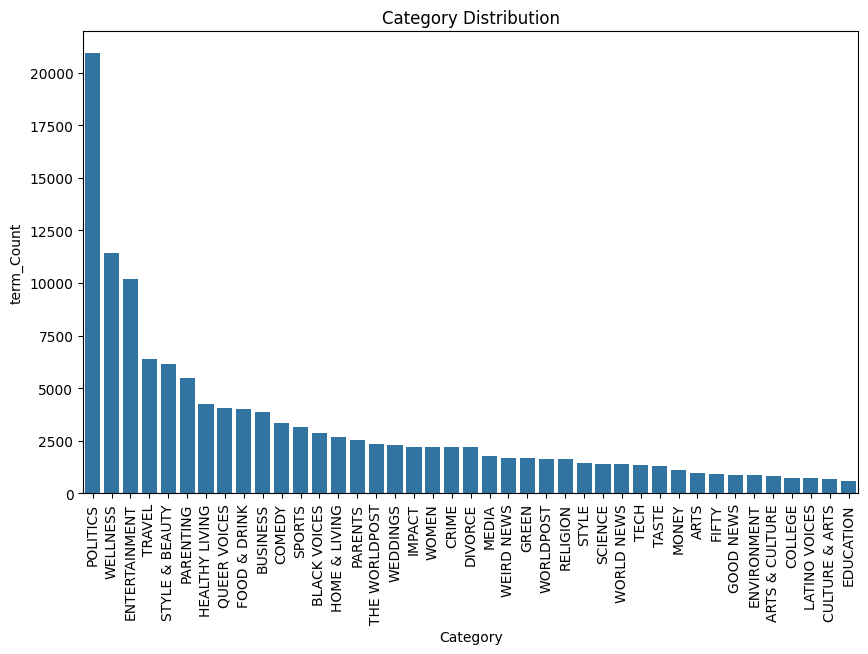

In [ ]:
# Initial EDA
def plot_category_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='category', data=df, order=df['category'].value_counts().index)
    #sns.countplot(x='category', data=df)
    plt.xticks(rotation=90)
    plt.title('Category Distribution')
    plt.xlabel('Category')
    plt.ylabel('term_Count')
    plt.show()
# Draw the plot
plot_category_distribution(train_df)



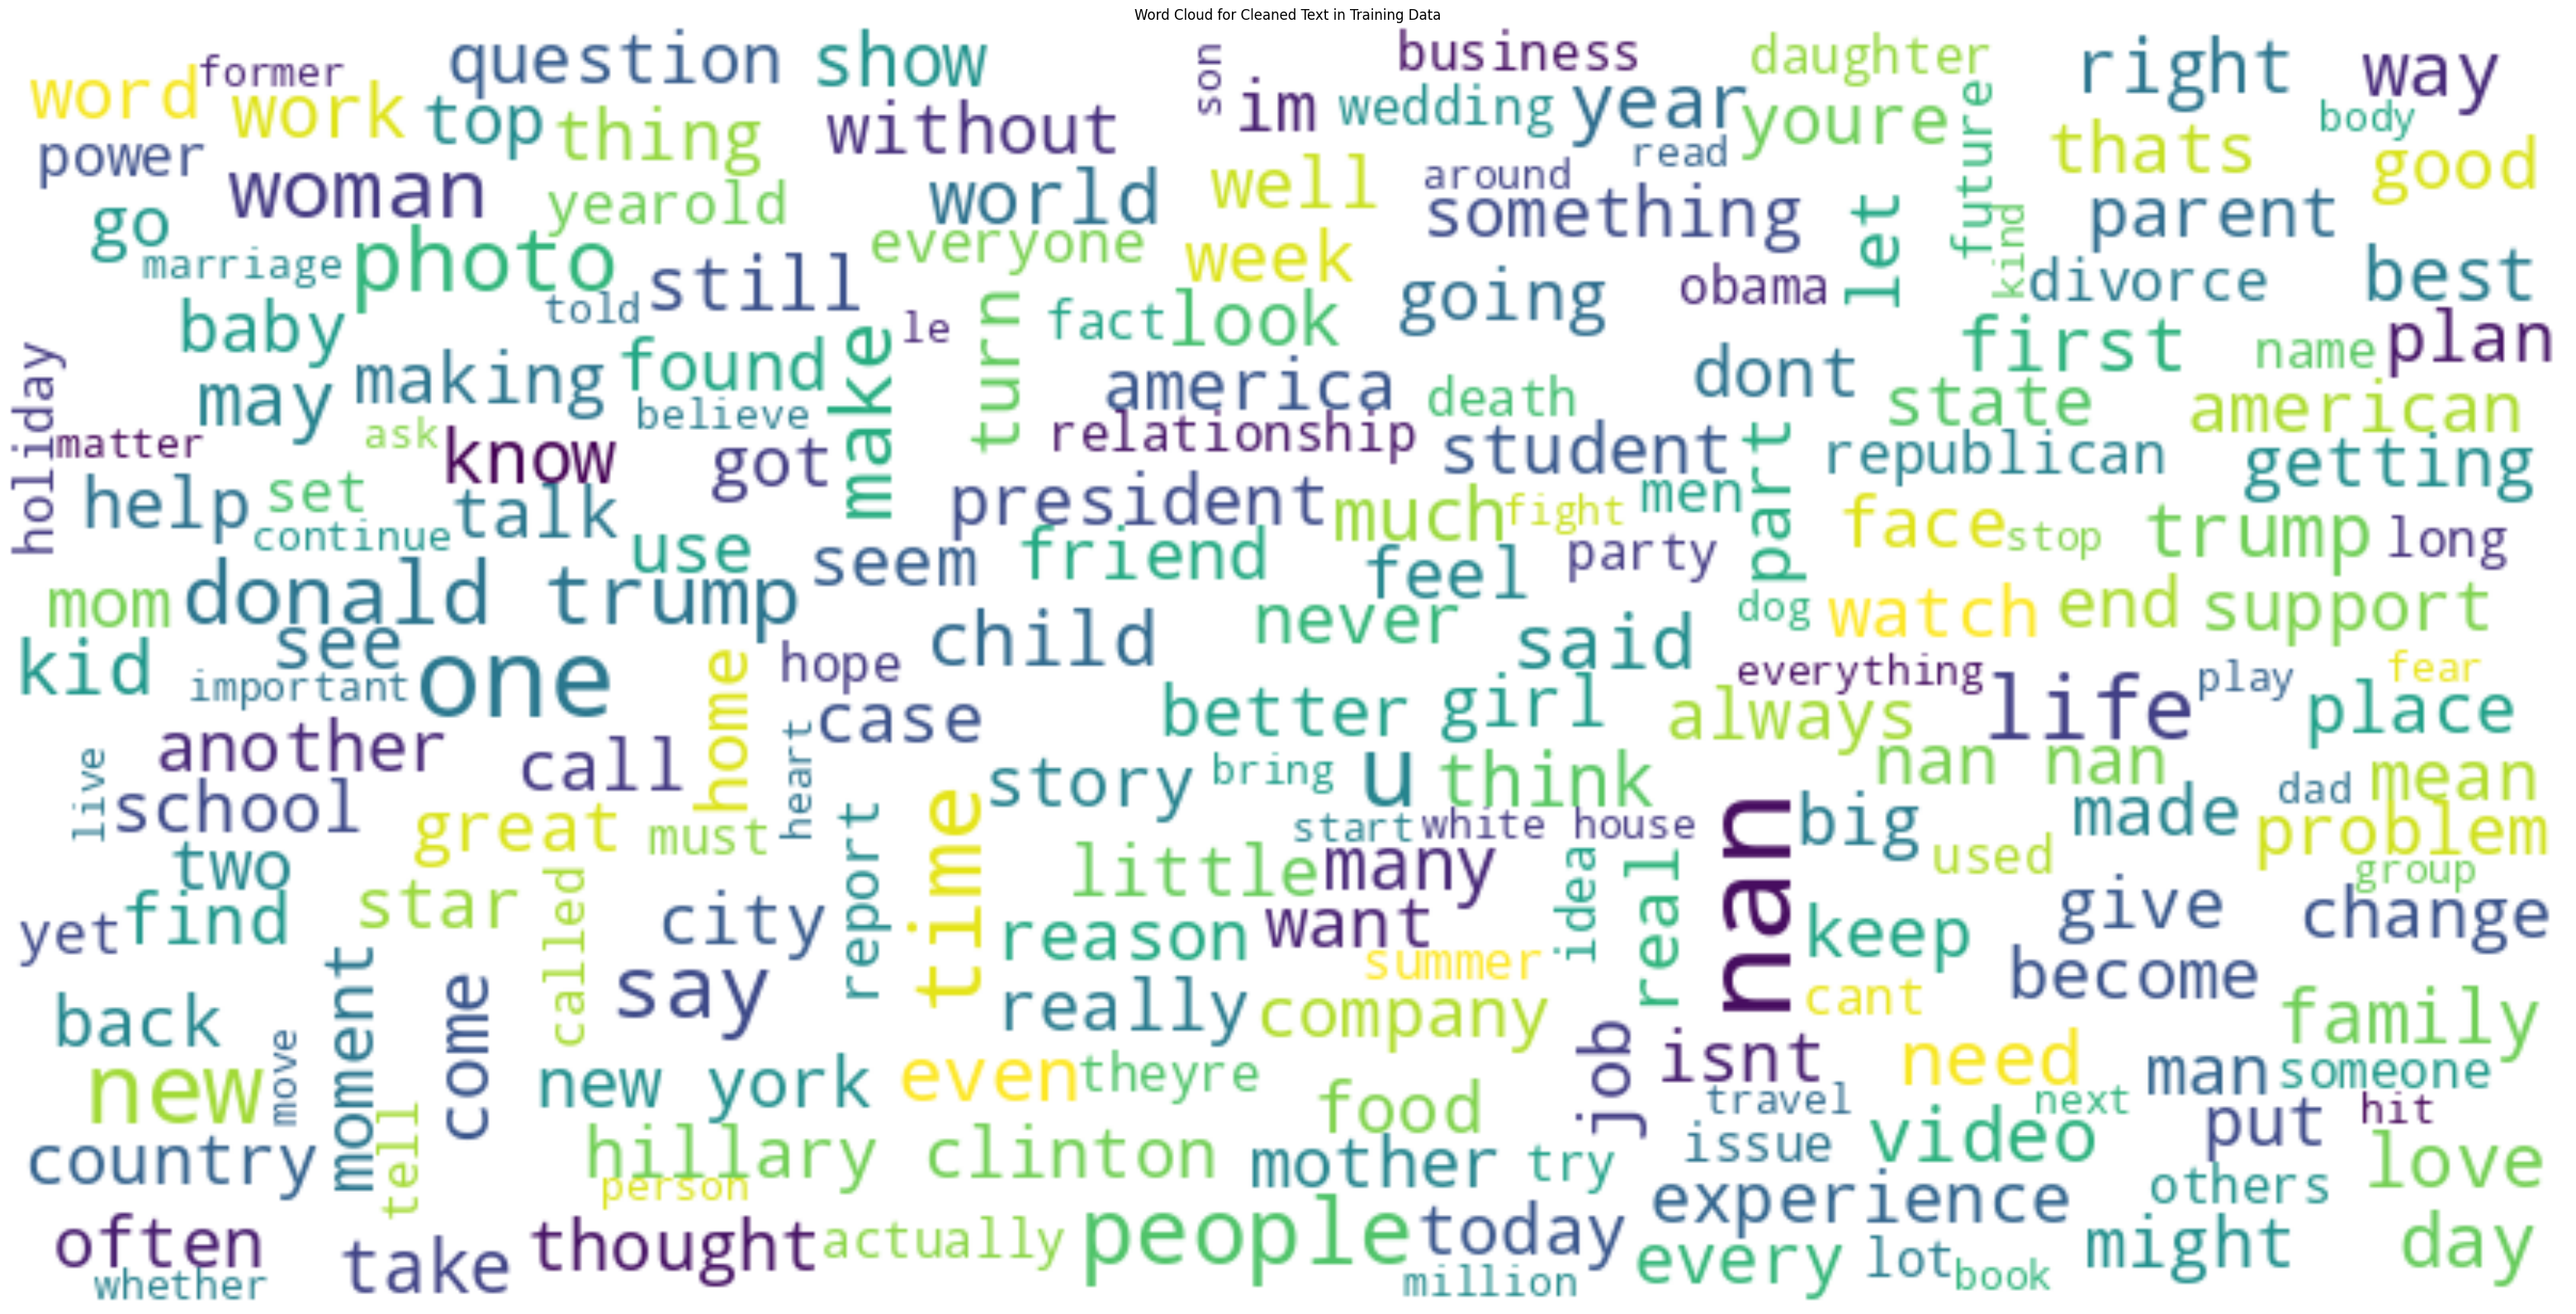

In [ ]:
# Generate a word cloud for the cleaned text in training data
all_text = ' '.join(X_train['cleaned_text'])
wordcloud = WordCloud(width=800, height=400,max_font_size=40, background_color='white').generate(all_text)
#wordcloud = WordCloud(background_color="white",max_words=len(all_text),max_font_size=35, relative_scaling=.5).generate(all_text)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cleaned Text in Training Data')
plt.show()


## STEP-4:  Text Representation

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), min_df=5, max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train['cleaned_text'])
X_val_tfidf = vectorizer.transform(X_val['cleaned_text'])

In [ ]:
# Model Selection and Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

## MODEL EVALATION ON TRAIN AND VAL set

In [ ]:
# Model Evaluation
y_train_pred = model.predict(X_train_tfidf)
y_val_pred = model.predict(X_val_tfidf)


In [ ]:
print("Training Performance:")
print(classification_report(y_train, y_train_pred))
print("Validation Performance:")
print(classification_report(y_val, y_val_pred))

print(f'Training Accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Validation Accuracy: {accuracy_score(y_val, y_val_pred)}')


Training Performance:
                precision    recall  f1-score   support

          ARTS       0.66      0.13      0.22       965
ARTS & CULTURE       0.61      0.29      0.39       848
  BLACK VOICES       0.64      0.38      0.48      2894
      BUSINESS       0.59      0.46      0.51      3854
       COLLEGE       0.59      0.30      0.40       737
        COMEDY       0.69      0.42      0.52      3361
         CRIME       0.66      0.48      0.56      2212
CULTURE & ARTS       0.73      0.32      0.44       669
       DIVORCE       0.85      0.73      0.78      2204
     EDUCATION       0.54      0.32      0.40       612
 ENTERTAINMENT       0.59      0.64      0.62     10203
   ENVIRONMENT       0.76      0.29      0.42       855
         FIFTY       0.73      0.08      0.15       910
  FOOD & DRINK       0.66      0.79      0.72      4019
     GOOD NEWS       0.68      0.15      0.24       891
         GREEN       0.57      0.35      0.43      1664
HEALTHY LIVING       0.58

## INFERENCES:

1) The model demonstrates varying performance across different categories, with some categories achieving higher precision, recall, and F1-scores than others. This indicates that the model's effectiveness differs across different news article topics or themes.

2) The lower validation F1-score compared to the training F1-score suggests that the model may be overfitting to the training data, emphasizing the need for techniques to mitigate overfitting and improve generalization to unseen data. Also Training accuracy is higher than validation accuracy so te model is overfitting

## PREDICTION ND EVALUATION ON TEXT DATA


In [ ]:
# Preprocess and Transform Test Data
test_df['cleaned_text'] = (test_df['headline'] + ' ' + test_df['short_description']).astype(str).apply(preprocess_text)
X_test_tfidf = vectorizer.transform(test_df['cleaned_text'])
# Evaluate on Test Data
y_test_pred = model.predict(X_test_tfidf)

In [ ]:
# Evaluate on Test Data
y_test_pred = model.predict(X_test_tfidf)

# Add prediction to the test_df
test_df['predicted_category'] = y_test_pred

#



In [ ]:
# print the result
print("Predicted categories for test data:")
print(test_df[['REF_NO', 'predicted_category']])

Predicted categories for test data:
       REF_NO predicted_category
0      146508           WELLNESS
1       90083           POLITICS
2       57183           BUSINESS
3       11632       QUEER VOICES
4      196326           WEDDINGS
...       ...                ...
40166  149815             SPORTS
40167  171253             TRAVEL
40168   36155             SPORTS
40169   89511           POLITICS
40170   47812     CULTURE & ARTS

[40171 rows x 2 columns]


In [ ]:
# Optional: Save to CSV
test_df[['REF_NO', 'predicted_category']].to_csv('/content/drive/MyDrive/NLP_PROJECT_IITG/Data/predicted_test_data.csv', index=False)


In [ ]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
# Tokenization and padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['cleaned_text'])
X_train_seq = tokenizer.texts_to_sequences(train_df['cleaned_text'])
X_val_seq = tokenizer.texts_to_sequences(val_df['cleaned_text'])

In [ ]:
X_train_pad = pad_sequences(X_train_seq, maxlen=128)
X_val_pad = pad_sequences(X_val_seq, maxlen=128)

In [ ]:
# Encode labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(train_df['category'])
y_val_encoded = le.transform(val_df['category'])

In [ ]:
# Define Feedforward Neural Network (DNN) model
model_dnn = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=128),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])

model_dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the DNN model
history_dnn = model_dnn.fit(X_train_pad, y_train_encoded, epochs=5, batch_size=32, validation_data=(X_val_pad, y_val_encoded))


Epoch 1/10
4018/4018 [==============================] - 26s 6ms/step - loss: 1.5024 - accuracy: 0.5790 - val_loss: 1.6996 - val_accuracy: 0.5403
Epoch 2/10
4018/4018 [==============================] - 18s 4ms/step - loss: 1.4492 - accuracy: 0.5900 - val_loss: 1.6868 - val_accuracy: 0.5417
Epoch 3/10
4018/4018 [==============================] - 18s 4ms/step - loss: 1.4055 - accuracy: 0.5991 - val_loss: 1.6930 - val_accuracy: 0.5418
Epoch 4/10
4018/4018 [==============================] - 18s 4ms/step - loss: 1.3680 - accuracy: 0.6077 - val_loss: 1.7099 - val_accuracy: 0.5386
Epoch 5/10
4018/4018 [==============================] - 18s 5ms/step - loss: 1.3348 - accuracy: 0.6143 - val_loss: 1.6963 - val_accuracy: 0.5429
Epoch 6/10
4018/4018 [==============================] - 17s 4ms/step - loss: 1.3042 - accuracy: 0.6211 - val_loss: 1.7105 - val_accuracy: 0.5397
Epoch 7/10
4018/4018 [==============================] - 17s 4ms/step - loss: 1.2768 - accuracy: 0.6267 - val_loss: 1.7162 - val_ac

In [ ]:
# Evaluate the DNN model
y_val_pred_dnn = model_dnn.predict(X_val_pad)
y_val_pred_classes_dnn = y_val_pred_dnn.argmax(axis=1)

1005/1005 [==============================] - 2s 2ms/step


In [ ]:
print("DNN Validation Performance:")
print(classification_report(y_val_encoded, y_val_pred_classes_dnn))
print(f'DNN Validation Accuracy: {accuracy_score(y_val_encoded, y_val_pred_classes_dnn)}')


DNN Validation Performance:
              precision    recall  f1-score   support

           0       0.31      0.17      0.22       261
           1       0.30      0.27      0.28       197
           2       0.43      0.36      0.39       713
           3       0.49      0.31      0.38       963
           4       0.34      0.23      0.28       183
           5       0.45      0.36      0.40       814
           6       0.46      0.37      0.41       516
           7       0.38      0.31      0.34       157
           8       0.65      0.72      0.68       508
           9       0.46      0.26      0.33       178
          10       0.33      0.71      0.45      2594
          11       0.33      0.29      0.31       198
          12       0.29      0.12      0.17       216
          13       0.54      0.77      0.64      1001
          14       0.16      0.15      0.16       236
          15       0.37      0.24      0.29       428
          16       0.47      0.10      0.17      1101

In [ ]:
# Define Recurrent Neural Network (RNN) model
model_rnn = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=128),
    LSTM(64, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])


In [ ]:
model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the RNN model
history_rnn = model_rnn.fit(X_train_pad, y_train_encoded, epochs=5, batch_size=32, validation_data=(X_val_pad, y_val_encoded))


Epoch 1/5
4018/4018 [==============================] - 520s 127ms/step - loss: 2.2691 - accuracy: 0.4018 - val_loss: 1.8634 - val_accuracy: 0.5013
Epoch 2/5
4018/4018 [==============================] - 511s 127ms/step - loss: 1.6851 - accuracy: 0.5407 - val_loss: 1.6685 - val_accuracy: 0.5446
Epoch 3/5
4018/4018 [==============================] - ETA: 0s - loss: 1.4955 - accuracy: 0.5824